In [130]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
%matplotlib inline

In [299]:
def Trapezoidal(f,xmin,xmax,N):
    deltax = (xmax-xmin)/N
    tot = 0.5*f(xmin)*deltax
    for i in range(N-1):
        tot += f(xmin+(i+1)*deltax)*deltax
    tot += 0.5*f(xmax)*deltax
    return tot

def Simpson(f,xmin,xmax,N):
    # YOUR CODE HERE
    tot = f(xmin)
    deltax = (xmax-xmin)/N
    
    for i in range(N-1):
        if np.mod((i+1),2)==0:
            tot += 2*f(xmin+(i+1)*deltax)
        else:
            tot += 4*f(xmin+(i+1)*deltax)
    tot+= f(xmax)
    
    tot = tot*deltax/3.
    return tot

h = 0.72
#h = 0.678
H0 = h*100    
c = 3e8 #m/s


def E_squared(z,h=0.72,Om_rad=4.22*10**(-5)*h**(-2),Om_lambda=0.7,Om_mat=0.3):
    return Om_rad*(1+z)**4 + Om_mat*(1+z)**3 + Om_lambda
    
def E(z,h=0.72,Om_rad=4.22*10**(-5)*h**(-2),Om_lambda=0.7,Om_mat=0.3):
    return np.sqrt(Om_rad*(1+z)**4 + Om_mat*(1+z)**3 + Om_lambda)

def Hubble_squared(z):
    return (H0**2)*E_squared(z)

def Hubble(z):
    return H0*E(z) # km/s/Mpc

def critical_density(z):
    return (1./(3.*8.*np.pi*6.67))*10.**(-27)*Hubble_squared(z) # kg/m^3

def func(z):
    return (E(z)*(1+z))**(-1)

def over_E(z):
    return E(z)**(-1)

def integ(func,z1,z2,N=1000):
    z = np.logspace(np.log10(z1),np.log10(z2),N)
    y = func(z)

    A = 0
    for i in range(len(z)-1):
        A += np.abs((z[i+1]-z[i]))*y[i+1]
    return A

def integ_trap(func,z1,z2,N=1000):
    z = np.logspace(np.log10(z1),np.log10(z2),N)
    y = func(z)

    A = 0
    for i in range(len(z)-1):
        A += np.abs((z[i+1]-z[i]))*(y[i]+y[i+1])/2
    return A


def delta_time(z1,z2):
    #return ((H0**(-1)*Simpson(func,z1,z2,10**5))*(3*10**(19)))/(3.15*10**7)
    return ((H0**(-1)*integ_trap(func,z1,z2,10**(3)))*(3*10**(19)))/(3.15*10**7) #yr

def comoving_distance(z):
    zero = 10**(-20)
    return ((c*H0**(-1)*integ_trap(over_E,zero,z,10**(3)))/10**3) #Mpc

def comoving_volume_flat(z):
    return 4/3*np.pi*comoving_distance(z)**3


In [207]:
zero = 10.**(-15)
print(delta_time(3,4)/10**9," Gyr")
Age_universe = delta_time(zero,10e50)/10**9
print(Age_universe," Gyr")
print(delta_time(7.54,50)/10**9," Gyr")
print(Age_universe - delta_time(zero,7.54)/10**9," Gyr")

0.5645511029950239  Gyr
12.747633518569502  Gyr
0.5991941434753602  Gyr
0.6426204888802225  Gyr


In [208]:
cosmo = FlatLambdaCDM(H0=72,Om0=0.3)
print(cosmo.age(3) - cosmo.age(4))
cosmo.comoving_distance(2.987)
cosmo.comoving_distance(3.102)

0.5799554323874612 Gyr


<Quantity 6272.621598703321 Mpc>

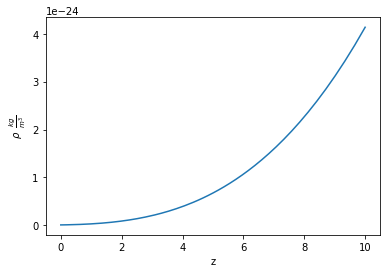

critical_density_today:  1.0308925391983635e-26  kg/m^3
critical_density(z=50):  4.158974353281534e-22  kg/m^3


In [209]:
z = np.logspace(np.log10(0.00000000000001),np.log10(10),1000)
plt.plot(z,critical_density(z))
plt.xlabel("z")
plt.ylabel(r"$\rho \;\; \frac{kg}{m^3}$")
plt.show()
print("critical_density_today: ",critical_density(10**(-100))," kg/m^3")
print("critical_density(z=50): ",critical_density(50)," kg/m^3")

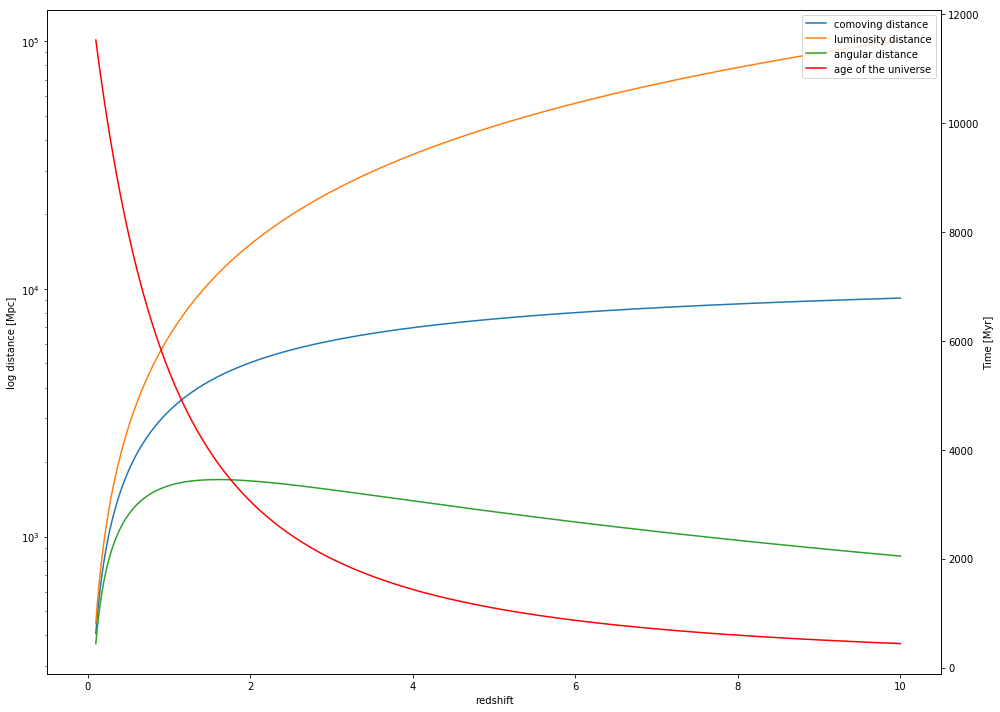

In [258]:
z = np.logspace(np.log10(0.1),np.log10(10),500)

zero = 10**(-20)
t = []
r = []
D_L = []
D_A = []
for i in range(len(z)):
    com_dis = comoving_distance(z[i])
    r.append(com_dis) #Mpc
    D_L.append(com_dis*(1+z[i])) #Mpc
    D_A.append(com_dis/(1+z[i])) #Mpc
    #t.append((Age_universe - delta_time(zero,z[i]))/10**6) #Myr
    t.append((delta_time(z[i],10.**(20)))/10**6) #Myr
    
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(111)

    
ax1.plot(z,r,label="comoving distance")
ax1.plot(z,D_L,label="luminosity distance")
ax1.plot(z,D_A,label="angular distance")
ax1.plot(0.,0.,"r",label="age of the universe")


#plt.show()

ax2 = ax1.twinx()
ax2.plot(z,t,"r",label="age of the universe")

ax1.semilogy()

#plt.xlim(0,3)
#plt.ylim(0.,20000)
ax1.set_xlabel("redshift")
ax1.set_ylabel("log distance [Mpc]")
ax2.set_ylabel("Time [Myr]")
ax1.legend(loc=1)
#ax2.legend()
plt.tight_layout()
plt.savefig("./distances.png")
plt.show()

In [272]:
D_A = np.array(D_A)
print(D_A.max())
print(z[np.where(D_A==D_A.max())])

1700.02316814
[ 1.60846948]


In [275]:
def redshift(l_o,l_e):
    return np.abs(l_o-l_e)/l_e

In [293]:
z1 = redshift(4862.24-15.,1215.67)
z2 = redshift(4862.24+15.,1215.67)
print(z1,z2)
print(comoving_distance_(z2)-comoving_distance_(z1)," Mpc")

2.98729918481 3.01197693453
23.0493140038  Mpc


In [292]:
cosmo.comoving_distance(z2)-cosmo.comoving_distance(z1)

<Quantity 23.03702707568209 Mpc>

In [306]:
print(cosmo.comoving_volume(z1))
print(4/3*np.pi*comoving_distance(z1)**3)
vol = comoving_volume_flat(z2) - comoving_volume_flat(z1)
print("Volume sphere",vol, " Mpc^3") 

982572605689.5809 Mpc3
984277441239.0
Volume sphere 11070697595.8  Mpc^3


In [302]:
def arcmin_to_rad(arcmin):
    return (arcmin/60)*(np.pi/180)

In [316]:
angle = arcmin_to_rad(5)
angle**2

2.1153987485188096e-06

In [310]:
print("Observed sphere in 5': ",vol*(angle**2/(4*np.pi))," Mpc^3")

Observed sphere in 5':  1863.6200187  Mpc^3


In [312]:
z0 = redshift(4862.24,1215.67)
z0

2.9996380596707986

In [314]:
SB_0 = 28*(1+z0)**4
SB_0

7165.4059638291983

In [318]:
SB_intr = 28 -10*np.log10(1+z0)
SB_intr

21.979793076219863

In [319]:
np.log10(3)

0.47712125471966244